 Vitor Emanuel da Silva Rozeno

RA: 211044539

# **Regressão**

# **Car Price Prediction Challenge**
*predizer preços de diferentes carros*

## Atributos de entrada:


* (int) **ID**: ID do carro
* (int) **Levy**: imposto do carro
* (string) **Manufacturer**: empresa que produz
* (string) **Model**: modelo do carro
* (int) **Prod. year**: ano de produção
* (string) **Category**: categoria do carro (sedan, hatch...)
* (string/boolean) **Leather interior**: se o interior é de couro ou não
* (string) **Fuel type**: tipo de combustível
* (string) **Engine volume**: tipo de motor (1.0, 1.6 ...)
* (string) **Mileage**: quilometragem do carro
* (float) **Cylinders**: cilindrada do motor
* (string) **Gearbox type**: tipo de caixa de câmbio
* (string) **Drive wheels**: tipo de tração
* (string) **Doors**: quantidade de portas
* (string) **Wheel**: posição do volante
* (string) **Color**: cor do carro
* (int) **Airbags**: quantidade de airbags


## Atributo-meta (saída):

* (int) **Price**: preço do carro

## Motivação:

Neste problema, a saída pode ser qualquer número (no caso deste dataset, um inteiro), pode-se concluir que a melhor abordagem é utilizar um Método de Aprendizado de Máquina para Regressão, onde a máquina ao final atribuirá um valor de saída y a uma entrada x, isto é, uma predição do preço do carro.

Quanto a aplicação em si, este dataset é interessante por se encaixar no nicho do automobilismo e compra e venda de carros, especificamente, portanto uma abordagem em aprendizado de máquina é vantajosa para sistemas de estimativa de preços ou para análises do mercado e obtenção de novos conhecimentos/insights.





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Leitura dos dados
data = pd.read_csv('/content/car_price_prediction.csv')
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Análise exploratória dos dados e pré-processamento

In [ ]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
data.duplicated().sum()

313

In [ ]:
# Removendo duplicatas
data.drop_duplicates(inplace= True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Estatísticas do dataset
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
# Checando valores únicos de cada coluna
for col in data.columns:
    print(f'{col}:\n {data[col].unique()}\n')

ID:
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

Price:
 [13328 16621  8467 ... 56814 63886 22075]

Levy:
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '

In [ ]:
# Substituir "-" por 0 : coluna 'Levy'
data['Levy']=data['Levy'].replace('-','0').astype('float64')

# Removendo coluna ID, pois não é relevante para a análise
data = data.drop(columns=['ID'])

#Conversão de tipo em "Cylinders"
data["Cylinders"] = data["Cylinders"].astype(int)

# Substituir "04-May" por 4 e "02-May" por 2: coluna 'Doors'
data['Doors'] = data['Doors'].replace('04-May', 4)
data['Doors'] = data['Doors'].replace('02-Mar', 2)
data['Doors'] = data['Doors'].replace('>5', 5)
data['Doors'] = data['Doors'].astype(int)

# Transformar 'yes' em 1 e 'no' em 0, coluna Leather Interior
data['Leather interior'] = data['Leather interior'].replace({'Yes': 1, 'No': 0})

# Transformar 'x km' em 'x' e converter pra float
data['Mileage'] = data['Mileage'].str.replace(' km', '').astype(int)

# Tirar o "Turbo" e converter pra float
data['Engine volume'] = data['Engine volume'].str.replace('Turbo','').astype('float64')

data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,4x4,4,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,4x4,4,Left wheel,Black,8
2,8467,0.0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4,Variator,Front,4,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4,Automatic,4x4,4,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4,Automatic,Front,4,Left wheel,Silver,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  int64  
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  int64  
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  int64  
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

In [ ]:
# Convertendo colunas categóricas em variáveis numéricas
'''
cols_to_dummy = ['Manufacturer','Model','Category','Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
dummies = pd.get_dummies(data[cols_to_dummy])

# Concatenar os dummies ao DataFrame original, excluindo as colunas originais
data = pd.concat([data.drop(columns=cols_to_dummy), dummies], axis=1)
'''
# OBS: Foi testada as dummy variables, mas o desempenho não foi muito promissor

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in data.columns:
    if data[col].dtypes == 'object':
        # Convert the column to string type to ensure uniformity before encoding
        data[col] = data[col].astype(str)
        data[col] = le.fit_transform(data[col])

In [ ]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,32,1242,2010,4,1,2,3.5,186005,6,0,0,4,0,12,12
1,16621,1018.0,8,658,2011,4,0,5,3.0,192000,6,2,0,4,0,1,8
2,8467,0.0,21,684,2006,3,0,5,1.3,200000,4,3,1,4,1,1,2
3,3607,862.0,16,661,2011,4,1,2,2.5,168966,4,0,0,4,0,14,0
4,11726,446.0,21,684,2014,3,1,5,1.3,91901,4,0,1,4,0,12,4


In [ ]:
#Standardization (Padronização)
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(data), columns=data.columns)
'''

# Reescalomento: Normalização Min-Max
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data = pd.DataFrame(mms.fit_transform(data), columns=data.columns)

In [ ]:
# Função para substituir outliers pela mediana da coluna

def replace_outliers(df, columns):
    outlier_cols = []

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifica os outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        # Armazena os nomes das colunas que possuem outliers
        if outliers.any():
            outlier_cols.append(column)

        # Substitui os outliers pela mediana
        df.loc[outliers, column] = df[column].median()

    return outlier_cols


In [ ]:

outlier_cols = replace_outliers(data, data.columns )

# Print resultado
print("Colunas com outliers detectados:", outlier_cols)
print("DataFrame após substituir outliers:\n", data)


Colunas com outliers detectados: ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel']
DataFrame após substituir outliers:
           Price      Levy  Manufacturer     Model  Prod. year  Category  \
0      0.000507  0.119430      0.500000  0.781624    0.876543       0.4   
1      0.000632  0.086905      0.125000  0.414097    0.888889       0.4   
2      0.000322  0.000000      0.328125  0.430459    0.827160       0.3   
3      0.000137  0.073587      0.250000  0.415985    0.888889       0.4   
4      0.000446  0.038074      0.328125  0.430459    0.925926       0.3   
...         ...       ...           ...       ...         ...       ...   
18919  0.000322  0.000000      0.562500  0.242291    0.901235       0.1   
18920  0.000596  0.070941      0.359375  0.839522    0.888889       0.9   
18921  0.000992  0.071368      0.359375  0.907489    0.876543       0.4   
18922  0.000203  0.109954      0.125000  0.286973    0.8

In [ ]:
# Separação das features e da variável alvo

X = data.drop('Price', axis=1)  # Features (X), sem coluna de alvo (y)
y = data['Price']  # Variável alvo (y)
print(X.head())
print(y.head())

       Levy  Manufacturer     Model  Prod. year  Category  Leather interior  \
0  0.119430      0.500000  0.781624    0.876543       0.4               1.0   
1  0.086905      0.125000  0.414097    0.888889       0.4               0.0   
2  0.000000      0.328125  0.430459    0.827160       0.3               0.0   
3  0.073587      0.250000  0.415985    0.888889       0.4               1.0   
4  0.038074      0.328125  0.430459    0.925926       0.3               1.0   

   Fuel type  Engine volume   Mileage  Cylinders  Gear box type  Drive wheels  \
0   0.333333          0.175  0.000087        0.2       0.000000           0.5   
1   0.833333          0.150  0.000089        0.2       0.666667           0.5   
2   0.833333          0.065  0.000093        0.2       0.000000           0.5   
3   0.333333          0.125  0.000079        0.2       0.000000           0.5   
4   0.833333          0.065  0.000043        0.2       0.000000           0.5   

      Doors  Wheel     Color  Airbags 

In [ ]:
# Divisão treino-teste: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algoritmos de Regressão

In [ ]:
# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=2000, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Avaliação e visualização dos modelos

In [ ]:
'''
Cálculo de medidas:
MAE: Erro médio absoluto
MSE: Erro médio quadrático
RMSE: Raiz quadrada do erro médio quadrático
R²: Coeficiente de determinação
'''
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r_squared = r2_score(y_true, y_pred)
    return mae, mse, rmse, r_squared

In [ ]:
metrics_lr = evaluate_model(y_test, y_pred_lr)

In [ ]:
metrics_rf = evaluate_model(y_test, y_pred_rf)

In [ ]:
metrics_gb = evaluate_model(y_test, y_pred_gb)

In [ ]:
results = pd.DataFrame({
    'Model': ['Regressão Linear', 'Random Forest', 'Gradient Boosting'],
    'MAE': [metrics_lr[0], metrics_rf[0], metrics_gb[0]],
    'MSE': [metrics_lr[1], metrics_rf[1], metrics_gb[1]],
    'RMSE': [metrics_lr[2], metrics_rf[2], metrics_gb[2]],
    'R²': [metrics_lr[3], metrics_rf[3], metrics_gb[3]]
})

Os resultados indicam que o random forest teve um desempenho melhor, com menor erro e mais explicabilidade dos dados, de acordo com o r_square.

Por outro lado, a regressão linear não se ajustou muito bem ao problema, não conseguindo um bom desempenho.

In [ ]:
results

,Model,MAE,MSE,RMSE,R²
0,Regressão Linear,0.000315,1.560921e-07,0.000395,0.112229
1,Random Forest,0.000148,5.905713e-08,0.000243,0.664114
2,Gradient Boosting,0.000190,7.473127e-08,0.000273,0.574967


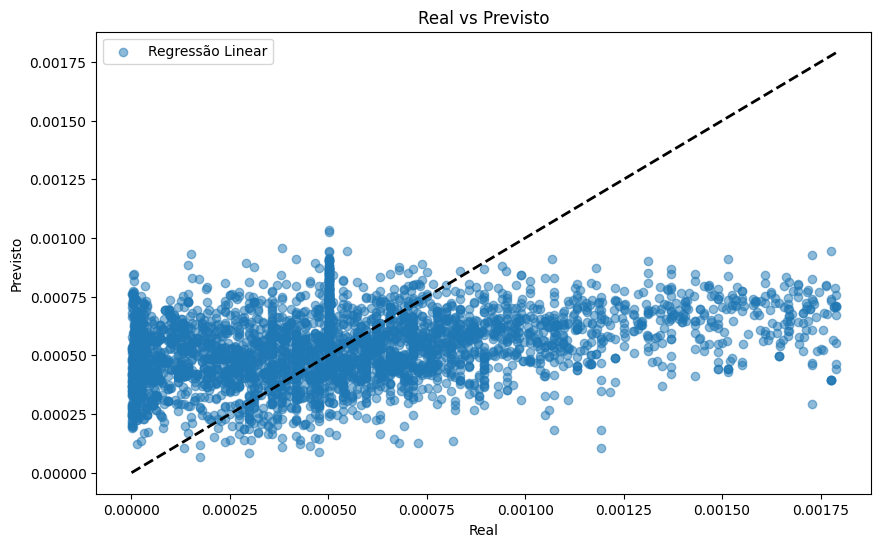

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Regressão Linear', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Real vs Previsto')
plt.legend()
plt.show()

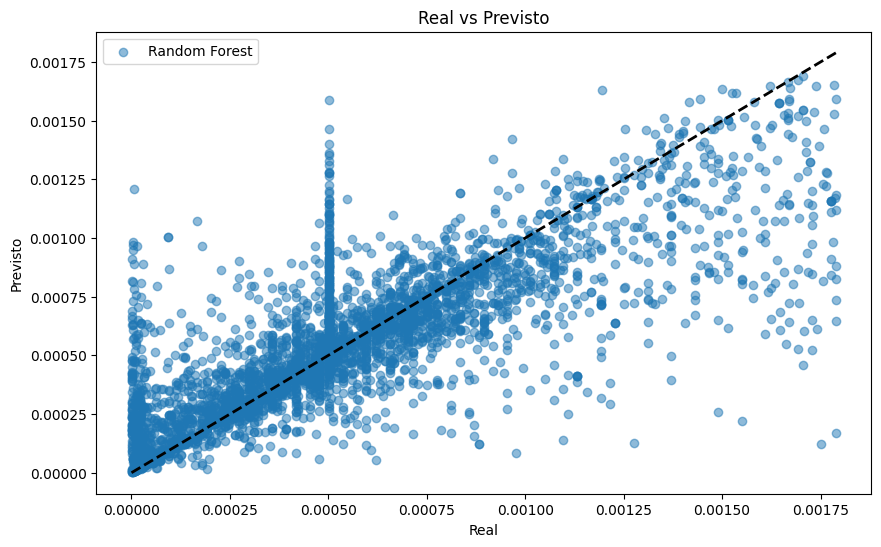

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Real vs Previsto')
plt.legend()
plt.show()

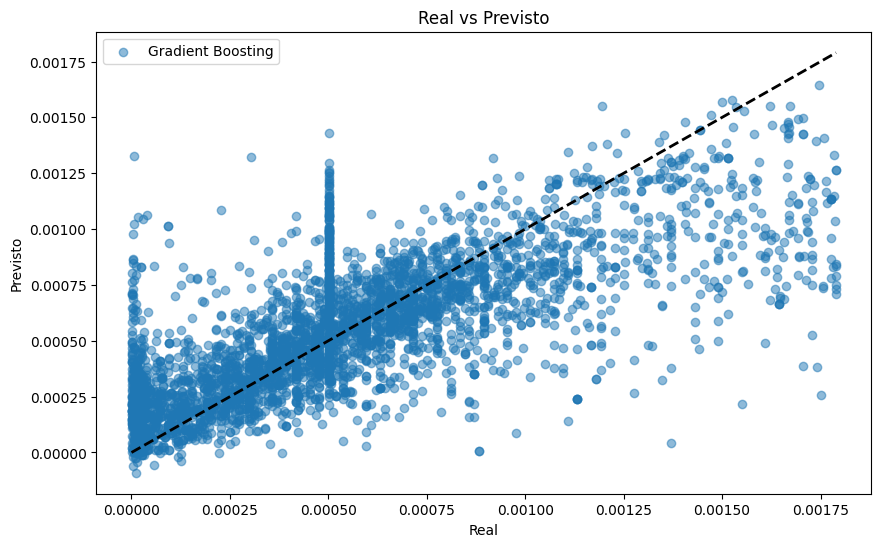

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, label='Gradient Boosting', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Real vs Previsto')
plt.legend()
plt.show()

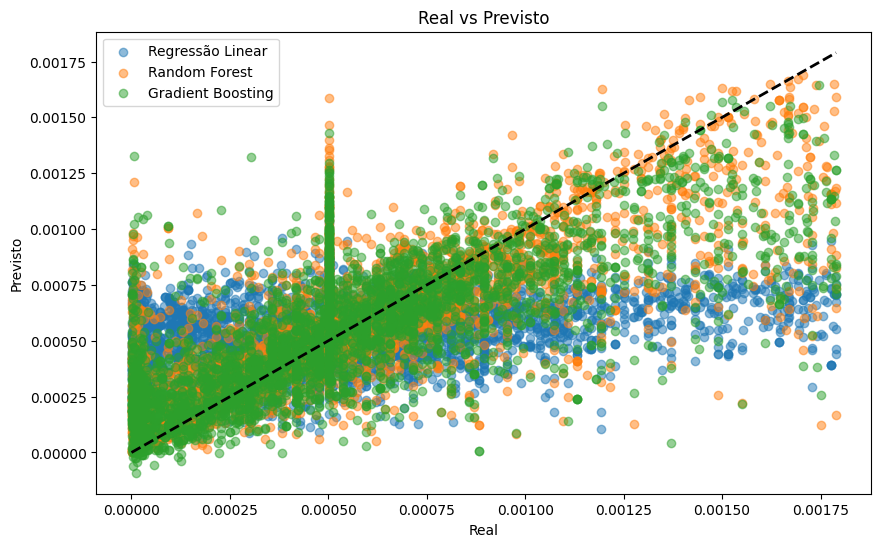

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Regressão Linear', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_gb, label='Gradient Boosting', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Real vs Previsto')
plt.legend()
plt.show()

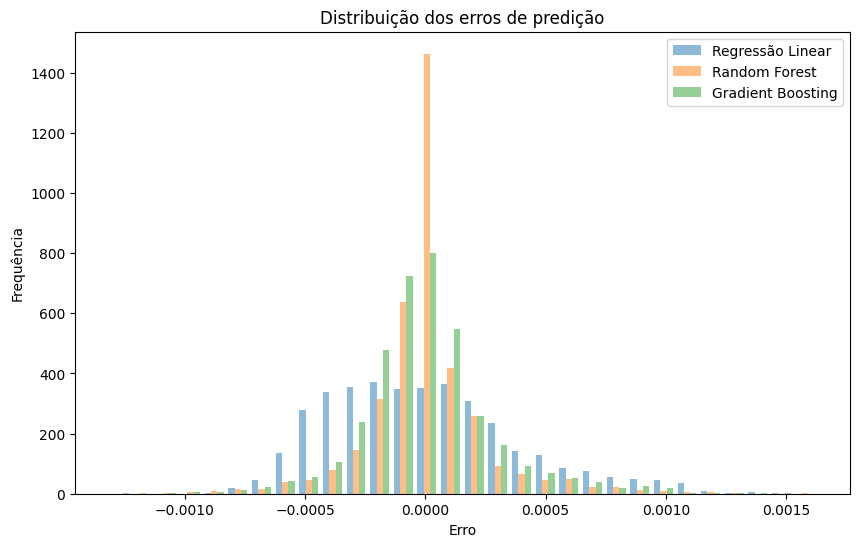

In [ ]:
plt.figure(figsize=(10, 6))
errors = [y_test - y_pred_lr, y_test - y_pred_rf, y_test - y_pred_gb]
plt.hist(errors, bins=30, alpha=0.5, label=['Regressão Linear', 'Random Forest', 'Gradient Boosting'])
plt.title('Distribuição dos erros de predição')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.legend()
plt.show()